In [147]:
import pandas as pd
import numpy as np 

df = pd.read_csv('2025-04-avon-and-somerset-stop-and-search.csv')

#show information about the dataset
df.info()

# Count total rows in dataset
print(f"\nTotal rows: {len(df)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Type                                      569 non-null    object 
 1   Date                                      569 non-null    object 
 2   Part of a policing operation              0 non-null      float64
 3   Policing operation                        0 non-null      float64
 4   Latitude                                  472 non-null    float64
 5   Longitude                                 472 non-null    float64
 6   Gender                                    546 non-null    object 
 7   Age range                                 511 non-null    object 
 8   Self-defined ethnicity                    469 non-null    object 
 9   Officer-defined ethnicity                 468 non-null    object 
 10  Legislation                           

In [148]:
# # Count missing values per column
print("\nMissing values per column:")
print(df.isnull().sum())

# # Count empty strings per column in case they have just ""
print("\nEmpty string values per column:")
print((df == "").sum())



Missing values per column:
Type                                          0
Date                                          0
Part of a policing operation                569
Policing operation                          569
Latitude                                     97
Longitude                                    97
Gender                                       23
Age range                                    58
Self-defined ethnicity                      100
Officer-defined ethnicity                   101
Legislation                                  38
Object of search                             40
Outcome                                      44
Outcome linked to object of search          392
Removal of more than just outer clothing     60
dtype: int64

Empty string values per column:
Type                                        0
Date                                        0
Part of a policing operation                0
Policing operation                          0
Latitude              


## Data Quality Assessment

- The dataset contains 569 rows and 15 columns.
- Using `df.info()`, we found several columns with missing values, most notably:
  - 'Part of a policing operation' and 'Policing operation' are completely empty.
  - Columns like 'Latitude', 'Longitude', 'Gender', and 'Ethnicity' have partial missing values.

- We also checked for empty strings using `(df == "").sum()` and found **no empty strings** in any columns.
- This means missing data is only due to `NaN` values.
- Based on this,  will drop these columns that are fully empty and decide how to handle partial missing values in other columns during cleaning.

---

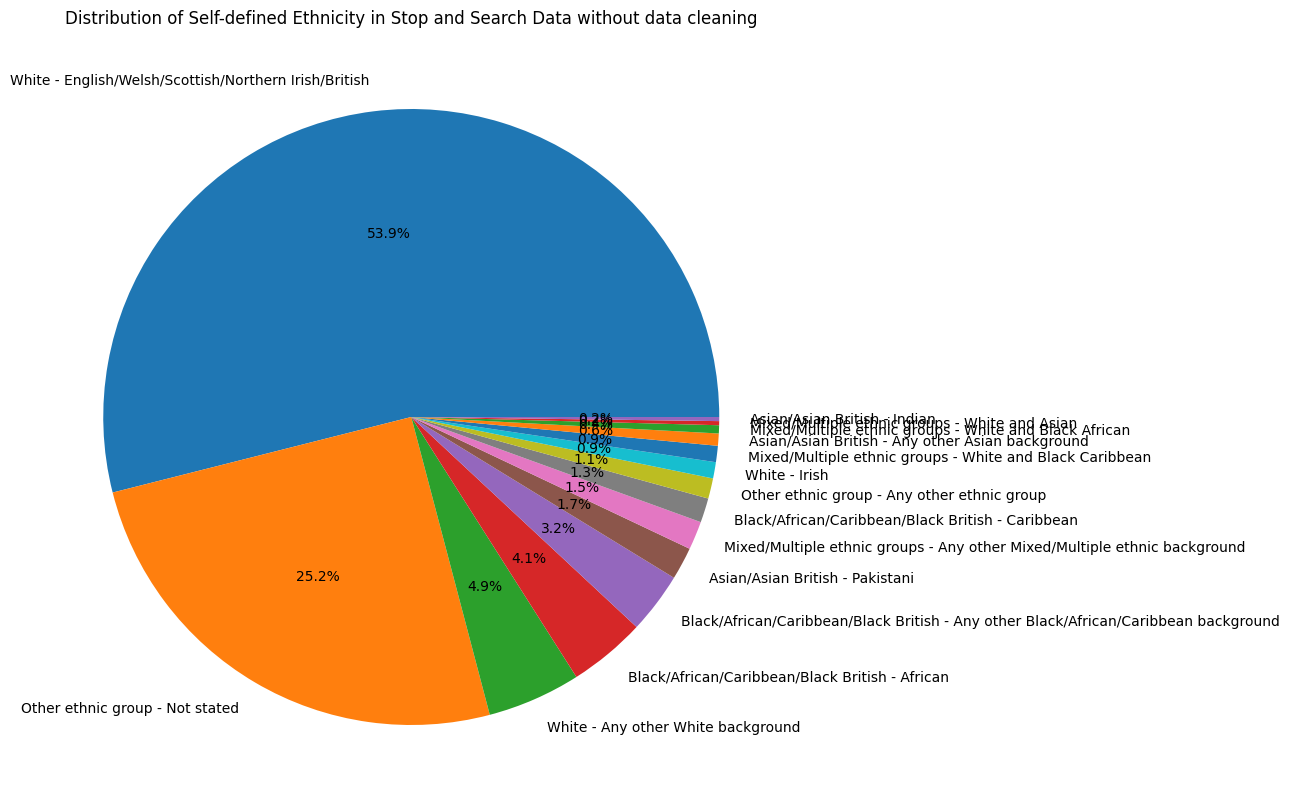

In [149]:
# display pie chart of types in Self-defined ethnicity
import matplotlib.pyplot as plt
# Count occurrences of each type in 'Self
sizes= df['Self-defined ethnicity'].value_counts()
#replace NaN with 'Unknown' for better visualization
# .plot(kind='pie', autopct='%1.1f%%')

fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%',labels=sizes.index)


plt.title('Distribution of Self-defined Ethnicity in Stop and Search Data without data cleaning')
plt.show() 

# this is without the unknowns

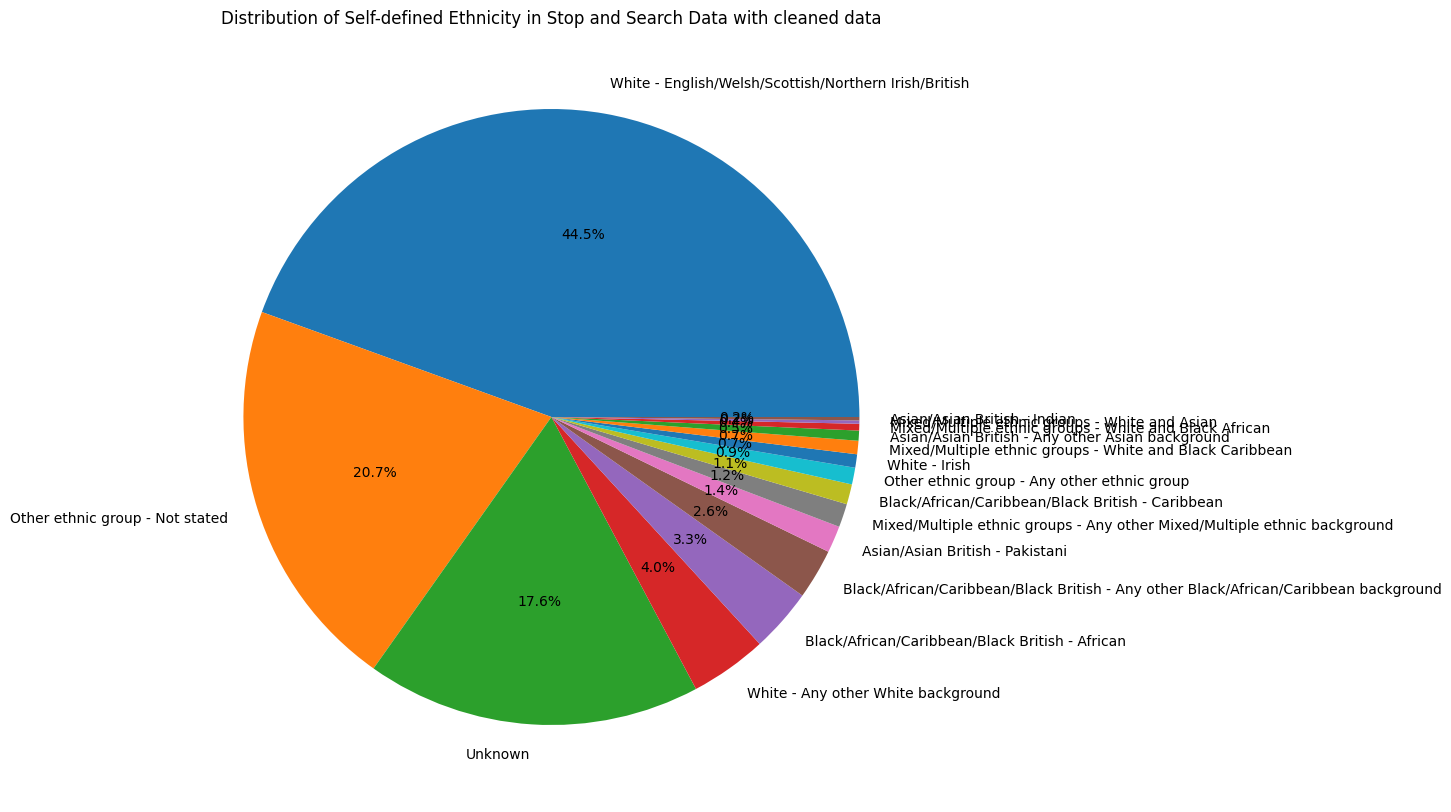

In [150]:
# display pie chart of types in Self-defined ethnicity
import matplotlib.pyplot as plt
# Count occurrences of each type in 'Self
df1 = df['Self-defined ethnicity'].fillna('Unknown')
sizes= df1.value_counts()
#replace NaN with 'Unknown' for better visualization
# .plot(kind='pie', autopct='%1.1f%%')

fig, ax = plt.subplots(figsize=(10, 10))
ax.pie(sizes, autopct='%1.1f%%',labels=sizes.index)


plt.title('Distribution of Self-defined Ethnicity in Stop and Search Data with cleaned data')
plt.show() 


### Two pie charts were generated:

- Excludes missing values (only non-null ethnicities).

- Includes 'Unknown' by replacing NaN with 'Unknown'.

---

### Key Observations:
 - 'Unknown' is a significant portion of the dataset when included (over 17%).

 - Excluding 'Unknown' can distort proportions and lead to misleading conclusions about known ethnic groups.

 - Including 'Unknown' provides a more accurate picture of the dataset’s completeness and real-world recording limitations


---

- **Keep `Officer-defined ethnicity`** for further analysis, as it has nearly the same number of non-null entries as `Self-defined ethnicity`.
- **Replace missing values with `'Unknown'`** in appropriate **categorical columns**, such as:
  - `Gender`
  - `Age range`
  - `Self-defined ethnicity`
  - `Officer-defined ethnicity`
  - `Legislation`
  - `Object of search`
  - `Outcome`
- **Do not replace missing values** in **location-based columns**, such as:
  - `Latitude`
  - `Longitude`  

  **Leave them as empty**

  ---

In [151]:
#drop columns 'Part of a policing operation and Policing operation'2024-03-avon-and-somerset-stop-and-search.csv
df = df.drop(columns=['Part of a policing operation', 'Policing operation'])

df.to_csv('2025-04-stop-search-cleaned.csv', index=False)


In [152]:
# Detect rows with more than 10 missing values
mostly_empty_rows = df[df.isnull().sum(axis=1) > 6]

# Display them as a table 
mostly_empty_rows

## find which rows to drop and why ?

,Type,Date,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
16,Person search,2025-04-02T16:08:34+00:00,NaN,NaN,Male,10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,Vehicle search,2025-04-05T00:00:00+00:00,50.942983,-2.632780,NaN,NaN,NaN,NaN,Police and Criminal Evidence Act 1984 (section 1),NaN,NaN,True,NaN
51,Person search,2025-04-05T04:47:21+00:00,NaN,NaN,Male,over 34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,Person search,2025-04-07T16:50:04+00:00,NaN,NaN,Male,over 34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,Person search,2025-04-08T05:22:50+00:00,NaN,NaN,Female,18-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,Person search,2025-04-08T07:38:36+00:00,NaN,NaN,Male,25-34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,Person search,2025-04-09T00:03:20+00:00,NaN,NaN,Male,18-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,Person search,2025-04-09T11:39:24+00:00,NaN,NaN,Male,10-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174,Vehicle search,2025-04-12T00:00:00+00:00,51.530693,-2.596496,NaN,NaN,NaN,NaN,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,NaN,NaN,NaN
229,Person search,2025-04-13T23:52:31+00:00,NaN,NaN,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Drop rows that are missing nearly all key fields (e.g., Gender, Age range, Ethnicity, Outcome, Legislation).
- This helps focus analysis on records that provide meaningful information while keeping enough data for robust insights

## Extra analysis using charts to see types:


<Axes: ylabel='Self-defined ethnicity'>

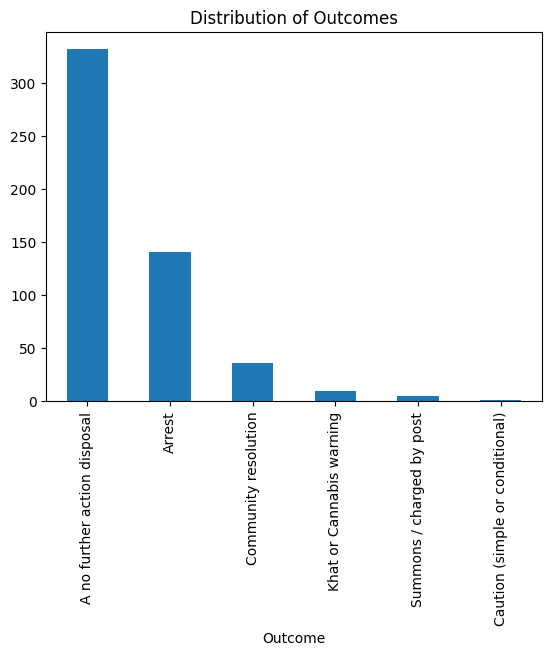

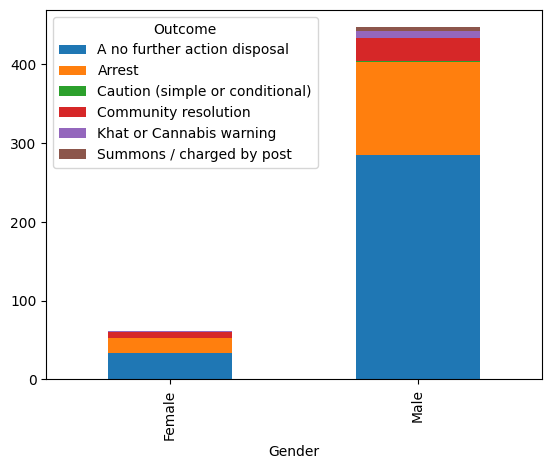

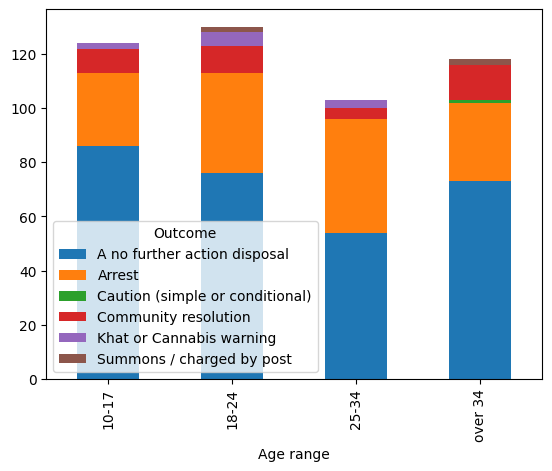

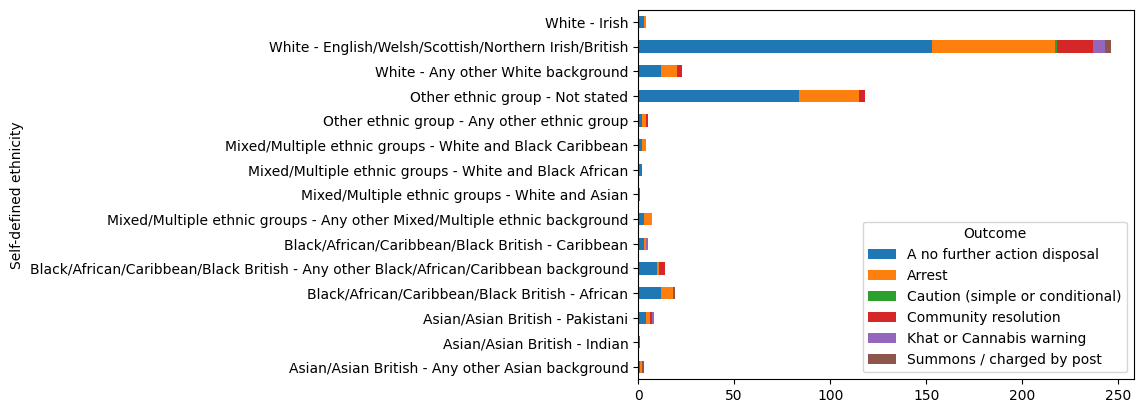

In [153]:
df['Outcome'].value_counts().plot(kind='bar', title='Distribution of Outcomes')

pd.crosstab(df['Gender'], df['Outcome']).plot(kind='bar', stacked=True)
pd.crosstab(df['Age range'], df['Outcome']).plot(kind='bar', stacked=True)
pd.crosstab(df['Self-defined ethnicity'], df['Outcome']).plot(kind='barh', stacked=True)

# df['Date'] = pd.to_datetime(df['Date'], format='%y%m%d')
# df['Date'].dt.date.value_counts().sort_index().plot(kind='line', title='Searches Over Time')



Missing values haven't been added with unknown which can distort the graphs as you can see above so 

--- 

## Cleaned Data

- Rows that were completely empty were dropped.
- Missing values in key categorical columns were replaced with `'Unknown'`.  
  These columns include:
  - Gender  
  - Age range  
  - Self-defined ethnicity  
  - Officer-defined ethnicity  
  - Legislation  
  - Object of search  
  - Outcome

This allows charts to show the full extent of missing or incomplete data and helps ensure those records are still included in the analysis.

---

In [154]:
df = df.dropna(how='all') # drop rows where all elements are NaN
# Missing values haven't been added with unknown which can distort the graphs as you can see above so columns_to_fill = [
    
columns_to_fill = [
    'Gender', 'Age range', 'Self-defined ethnicity',
    'Officer-defined ethnicity', 'Legislation',
    'Object of search', 'Outcome'
]

# will be placed with unknown
for column in columns_to_fill:
    df[column] = df[column].fillna('Unknown')

df.to_csv('2025-04-stop-search-cleaned.csv', index=False)

<Axes: ylabel='Self-defined ethnicity'>

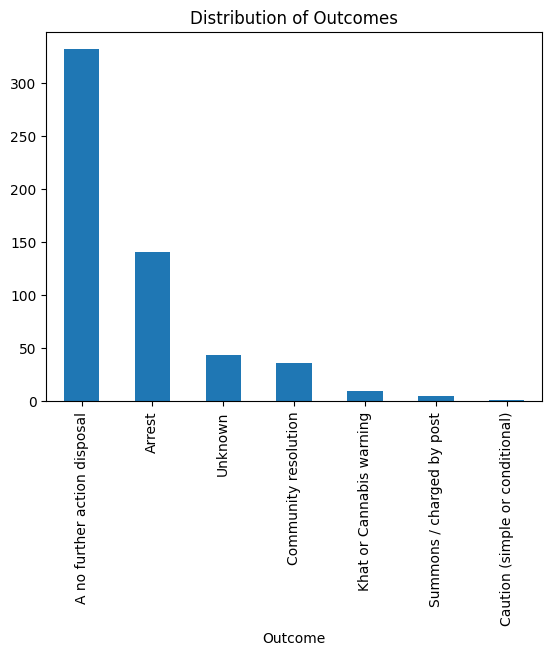

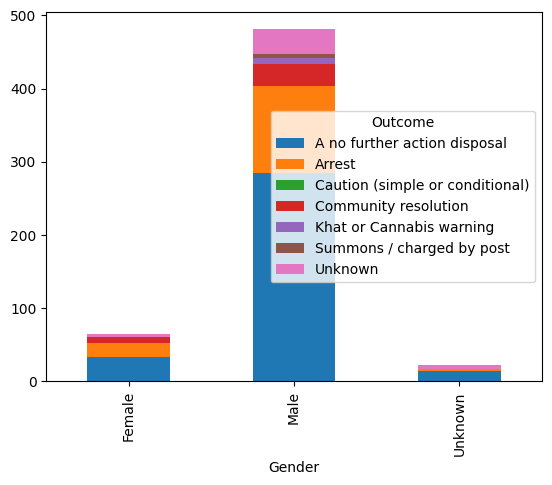

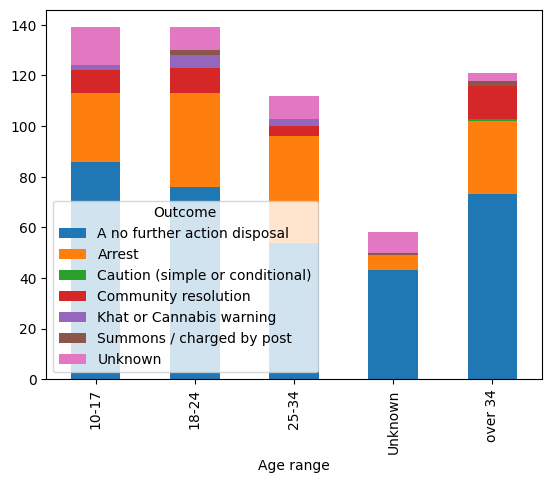

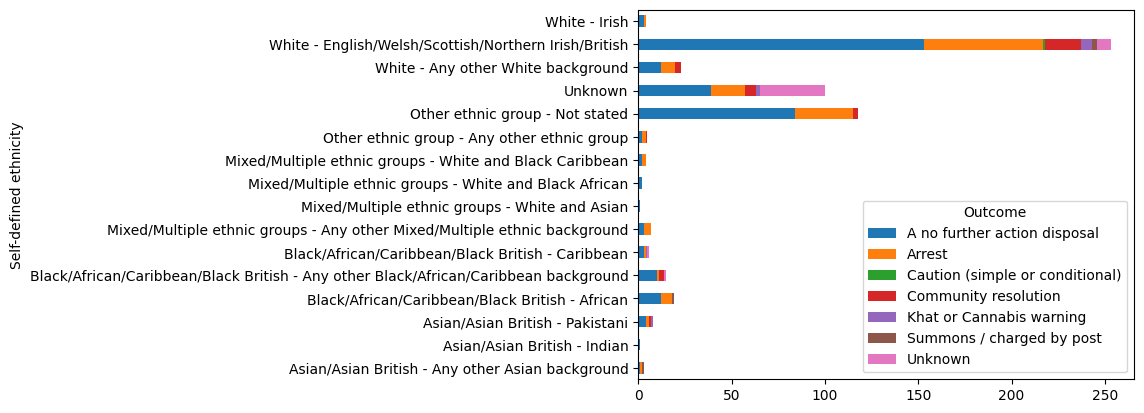

In [155]:
df['Outcome'].value_counts().plot(kind='bar', title='Distribution of Outcomes')

pd.crosstab(df['Gender'], df['Outcome']).plot(kind='bar', stacked=True)
pd.crosstab(df['Age range'], df['Outcome']).plot(kind='bar', stacked=True)
pd.crosstab(df['Self-defined ethnicity'], df['Outcome']).plot(kind='barh', stacked=True)


In [156]:
import folium

df_map = df.dropna(subset=['Latitude', 'Longitude']) # Ensure no NaN values in coordinates

m = folium.Map(location=[df_map['Latitude'].mean(), df_map['Longitude'].mean()], zoom_start=10)
for i, row in df_map.iterrows():
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']],radius=3,popup=row["Type"]).add_to(m)

m

m.save("my_map.html")


> [Click here to view the full interactive map](https://ilwad123.github.io/Crime-police-PowerBI-SQL/my_map.html)



## Insights from the interactive map 

Shows that cities are more heavily dense !

Bristol has the highest number of recorded stop-and-search locations in the region, and these are concentrated in densely populated urban neighborhoods, particularly:

- City Centre (Broadmead, Cabot Circus, Stokes Croft)
- St Paul’s & Montpelier
- Easton & Lawrence Hill
- Southville & Bedminster
- Redland, Cotham & Clifton

These are urban areas highly populated and are low-income areas meaning more likely to have higher police presence and linked to more stop-and-search.

Additionally the areas above have  large ethnic minority populations , which begs the question are these areas targeted disportioanlly because of race.

It shows it is best to keep the coordinates even if some are missing to give more of a background to help use it as evidence. 

Addirionally, cleaned data provided easier analysis? 

This analysis supports the development of a dashboard to further explore trends in the dataset for this month and across other months if needed.

---

## Conclusions:


The cleaned dataset allows for better visual insights.

By replacing missing values with 'Unknown', we now see the true extent of incomplete reporting.

The dataset reveals:
- Only **101 out of 569 records (~18%)** include officer-defined ethnicity.
- Only **100 out of 569 records** include the person of stop and search , self-defined ethnicity.

Charts now clearly show how many records lack information on ethnicity or outcomes, which may indicate incomplete reporting or biased recording practices .This may need further investigation into the under reporting .

Additionally, stop and searches appear to be more concentrated in low-income and ethnically diverse areas, raising questions about potential disparities.

## Next steps:

This notebook analysed **April 2025** stop and search data from the **Avon and Somerset Police**.

This **one-month snapshot** of this years data provides data of police activity. 

While this analysis is limited to one month, it sets the groundwork for comparisons over time if additional data is added later into the SQL database and be automated maybe for future months. 

- The cleaned dataset will be further explored using a **Power BI dashboard** to better visualise patterns and uncover any data gaps.

This is an important step toward building a more complete understanding of how stop-and-search practices operate in different communities.
